In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("./Data/heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
a = pd.get_dummies(df.ChestPainType)
b = pd.get_dummies(df.RestingECG)
c = pd.get_dummies(df.ST_Slope)
df = df.drop(columns = ["ChestPainType", "RestingECG", "ST_Slope"])
df = df.join(a)
df = df.join(b)
df = df.join(c)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,M,140,289,0,172,N,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,F,160,180,0,156,N,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,M,130,283,0,98,N,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,F,138,214,0,108,Y,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,M,150,195,0,122,N,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,N,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,M,144,193,1,141,N,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,M,130,131,0,115,Y,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,F,130,236,0,174,N,0.0,1,0,1,0,0,1,0,0,0,1,0


In [5]:
df.Sex = df.Sex.map(lambda x : 1 if x == "M" else 0)
df.ExerciseAngina = df.ExerciseAngina.map(lambda x : 1 if x == "Y" else 0)

In [6]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [7]:
y = df.HeartDisease
X = df.drop(columns = ["HeartDisease"])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

(array([321.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 367.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

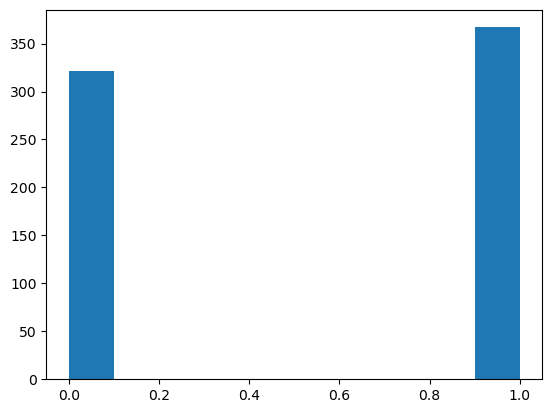

In [9]:
plt.hist(y_train)

## MLP

In [24]:
model1 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [25]:
train_acc = model1.score(X_train, y_train)
test_acc = model1.score(X_test, y_test)
print("train acc:",train_acc,"\ntest acc:", test_acc)

train acc: 0.8604651162790697 
test acc: 0.8956521739130435


In [26]:
y_pred = model1.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 76,  13],
       [ 11, 130]], dtype=int64)

| |Pred_neg|Pred_pos|
|-|--------|--------|
|neg|76|13|
|pos|11|130|

# NN

In [14]:
#!pip install keras

In [15]:
#!pip install tensorflow

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [38]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(18,)))
basic_model.add(Dense(1, activation='sigmoid'))

C:\Users\lalvaradomenendez\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train, y_train, epochs=100)
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5495 - loss: 0.7078
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7022 - loss: 0.5916
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7437 - loss: 0.5445
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7655 - loss: 0.4904
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.4556
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8370 - loss: 0.4066
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8412 - loss: 0.3822
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8359 - loss: 0.3816
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - loss: 0.3720
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8366 - loss: 0.3640
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.3449
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9152 - loss: 0.2544
Epoch 70/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9304 - loss: 0.2358
Epoch 71/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8973 - loss: 0.2722
Epoch 72/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9078 - loss: 0.2771
Epoch 73/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.2846
Epoch 74/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9184 - loss: 0.2384
Epoch 75/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9292 - loss: 0.1998
Epoch 76/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9129 - loss: 0.2518
Epoch 77/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9063 - loss: 0.2520
Epoch 78/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9115 - loss: 0.2440
Epoch 79/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9273 - loss: 0.2219
Epoch 80/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8

In [51]:
y_pred = basic_model.predict(X_test)
aux = []
for value in y_pred:
    if value > 0.4:
        aux.append(1)
    else:
        aux.append(0)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [52]:
confusion_matrix(y_test, aux)

array([[ 73,  19],
       [ 14, 124]], dtype=int64)

# Model 3

In [59]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

model3 = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
model3.score(X_test, y_test)

0.8869565217391304

In [60]:
y_pred = model3.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 79,  10],
       [ 16, 125]], dtype=int64)